<a href="https://colab.research.google.com/github/Atabak-Touri/NLP-CNN_RNN/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Required for Data downaload and preparation
import struct
import gzip
import os
from six.moves.urllib.request import urlretrieve


%env TF_FORCE_GPU_ALLOW_GROWTH=true

env: TF_FORCE_GPU_ALLOW_GROWTH=true


Downloading the dataset using tensorflows own dataset:

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
#the tf.keras.datasets modu le provides several datasets to be downloadedthrough TensorFlow.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


checking the size of the dataset:

In [6]:
print(f"train_images is of shape: {train_images.shape}")
print(f"train_labels is of shape: {train_labels.shape}")
print(f"test_images is of shape: {test_images.shape}")
print(f"test_labels is of shape: {test_labels.shape}")
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

train_images is of shape: (60000, 28, 28)
train_labels is of shape: (60000,)
test_images is of shape: (10000, 28, 28)
test_labels is of shape: (10000,)


 adding a new dimension
(of size 1) to the end of each tensor, as standard implementation of the convolution operation in  
TensorFlow is designed to work on a four-dimensional input (i.e. batch, height, width, and chan
nel dimensions).

In [7]:
train_images = train_images[:, : , :, None]
test_images = test_images[:, : ,: , None]

print(f"train_images is of shape: {train_images.shape}")
print(f"train_labels is of shape: {train_labels.shape}")
print(f"test_images is of shape: {test_images.shape}")
print(f"test_labels is of shape: {test_labels.shape}")

train_images is of shape: (60000, 28, 28, 1)
train_labels is of shape: (60000,)
test_images is of shape: (10000, 28, 28, 1)
test_labels is of shape: (10000,)


**Implementing CNN**

In [8]:
batch_size = 100 # This is the typical batch size we've been using

image_size = 28 # This is the width/height of a single image

# Number of color in an image.
n_channels = 1

# Number of classes
n_classes = 10

model details:

 • A convolutional layer with a 5x5 kernel, 1x1 stride, and valid padding

 • A max pooling layer with a 2x2 kernel, 2x2 stride, and valid pooling

 • A convolutional layer with a 5x5 kernel, 1x1 stride, and valid pooling

 • A max pooling layer with a 2x2 kernel, 2x2 stride, and valid pooling

 • A convolutional layer with a 4x4 kernel, 1x1 stride, and valid pooling

 • A layer that flattens the 2D output to a 1D vector

 • A Dense layer with 84 nodes

 • A final softmax prediction layer with 10 nodes

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

K.clear_session()

lenet_like_model = Sequential([
    # 1st convolutional layer
    Conv2D(
        filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu',
        input_shape=(image_size,image_size,n_channels)
    ), # in 28x28 / out 24x24
    # 1st max pooling layer
    MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'), # in 24x24 / out 12x12
    # 2nd convolutional layer
    Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'), # in 12x12 / out 8x8
    # 2nd max pooling layer
    MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'), # in 8x8 / out 4x4
    # 3rd convolutional layer
    Conv2D(filters=120, kernel_size=(4,4), strides=(1,1), padding='valid', activation='relu'), # in 4x4 / out 1x1
    # flatten the output of the last layer to suit a fully connected layer
    Flatten(),
    # First dense (fully-connected) layer
    Dense(84, activation='relu'),
    # Final prediction layer
    Dense(n_classes, activation='softmax')
])

# Compile with a loss and an optimizer
lenet_like_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary
lenet_like_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,686 (190.18 KB)

 Trainable params: 48,686 (190.18 KB)

 Non-trainable params: 0 (0.00 B)

training model:

In [10]:
lenet_like_model.fit(train_images, train_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7233 - loss: 1.1757 - val_accuracy: 0.8406 - val_loss: 0.4383
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8563 - loss: 0.3929 - val_accuracy: 0.8690 - val_loss: 0.3685
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8713 - loss: 0.3457 - val_accuracy: 0.8761 - val_loss: 0.3528
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8755 - loss: 0.3281 - val_accuracy: 0.8725 - val_loss: 0.3527
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8899 - loss: 0.2974 - val_accuracy: 0.8738 - val_loss: 0.3495


In [11]:
lenet_like_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8669 - loss: 0.3734


[0.37481260299682617, 0.8668000102043152]

In [12]:
test_predictions = lenet_like_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


**Visualizing the result:**

In [13]:
def collect_correct_incorrect_samples(test_images, test_labels, test_predictions, n_correct=10, n_incorrect=10):


    # Visualization purposes
    correctly_predicted_images, correct_labels, correct_predictions = [], [], []
    incorrectly_predicted_images, incorrect_labels, incorrect_predictions = [], [], []

    test_predicted_labels = np.argmax(test_predictions, axis=-1)

    i_correct, i_incorrect = 0, 0
    for sample_image, sample_label, sample_prediction, sample_predicted_label  in zip(test_images, test_labels, test_predictions, test_predicted_labels):

        if i_correct < n_correct and sample_predicted_label == sample_label:
            correctly_predicted_images.append(sample_image[:, :, 0])
            correct_predictions.append(sample_prediction)
            correct_labels.append(sample_label)
            i_correct += 1

        if i_incorrect < n_incorrect and sample_predicted_label != sample_label:
            incorrectly_predicted_images.append(sample_image[:, :, 0])
            incorrect_predictions.append(sample_prediction)
            incorrect_labels.append(sample_label)
            i_incorrect += 1

        if i_correct >= n_correct and i_incorrect >= n_incorrect:
            break


    correctly_predicted_images = np.stack(correctly_predicted_images, axis=0)
    correct_labels = np.array(correct_labels)
    correct_predictions = np.stack(correct_predictions, axis=0)
    incorrectly_predicted_images = np.stack(incorrectly_predicted_images, axis=0)
    incorrect_labels = np.array(incorrect_labels)
    incorrect_predictions = np.stack(incorrect_predictions, axis=0)

    return (correctly_predicted_images, correct_labels, correct_predictions), (incorrectly_predicted_images, incorrect_labels, incorrect_predictions)


(correctly_predicted_images, correct_labels, correct_predictions), \
    (incorrectly_predicted, incorrect_labels, incorrect_predictions) = collect_correct_incorrect_samples(test_images, test_labels, test_predictions)

In [14]:
correct_predictions[4,:]

array([6.0257636e-02, 2.2609318e-07, 3.9481588e-02, 2.2019665e-03,
       9.6664838e-03, 3.1932586e-06, 8.8767439e-01, 7.6621103e-07,
       7.1232114e-04, 1.3812030e-06], dtype=float32)

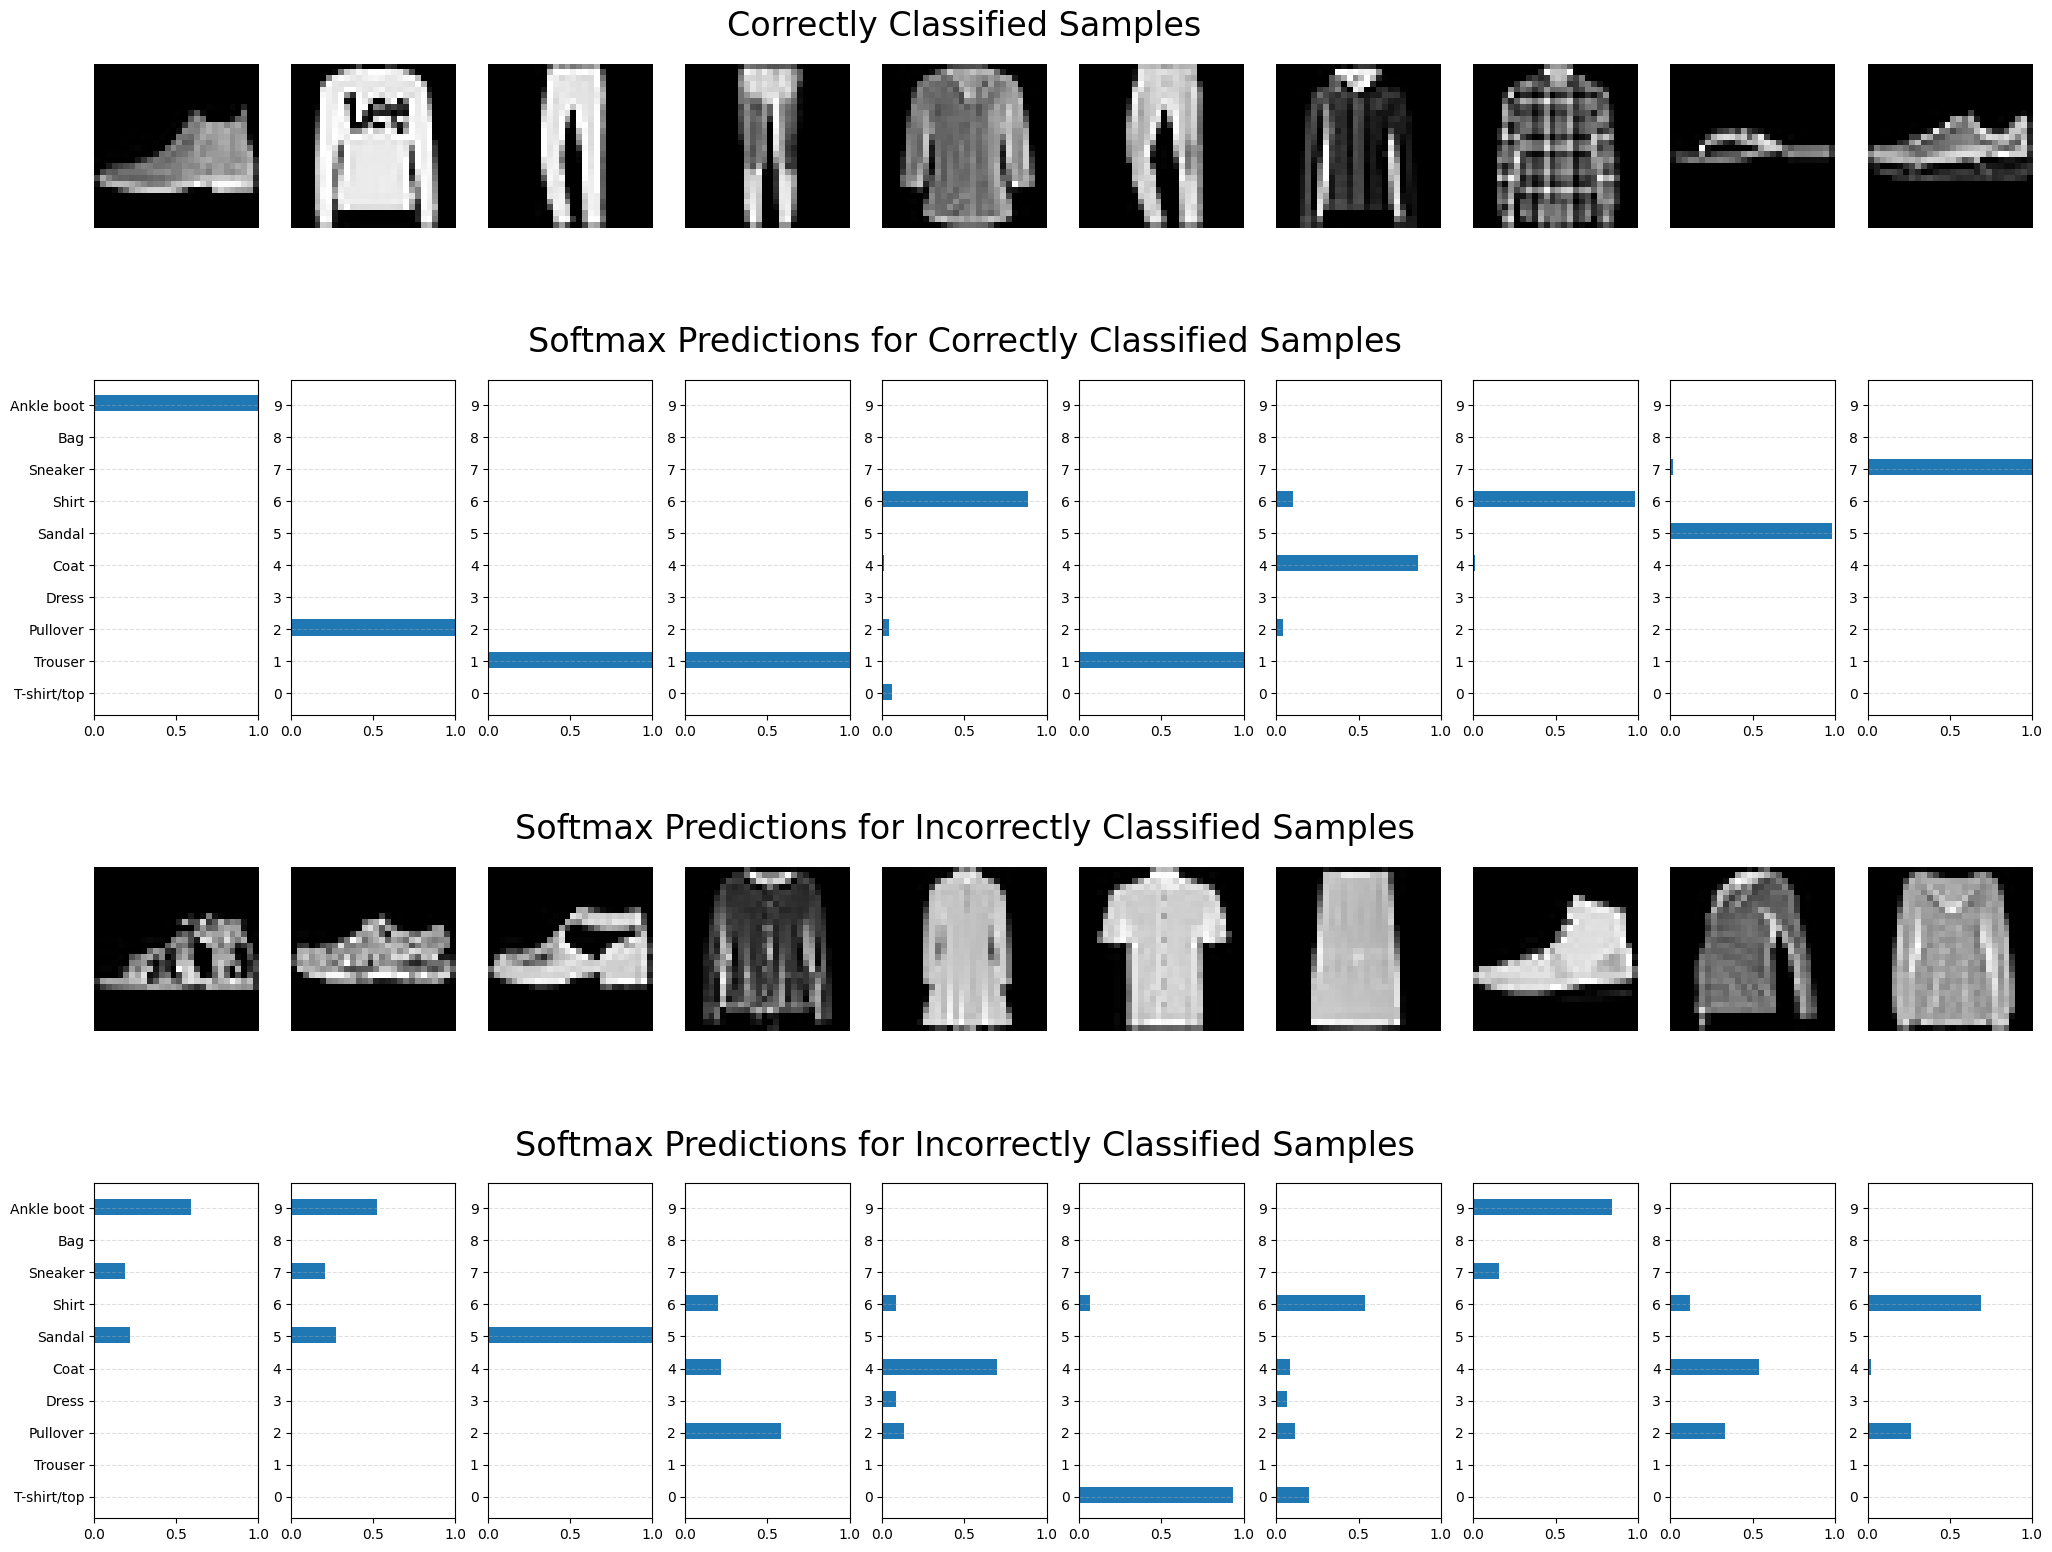

In [15]:
from math import ceil

def plot_correct_incorrect_instances(n_classes=10, label_map=None):

    (correctly_predicted_images, correct_labels, correct_predictions), \
    (incorrectly_predicted_images, incorrect_labels, incorrect_predictions) = collect_correct_incorrect_samples(test_images, test_labels, test_predictions)

    n_cols = correctly_predicted_images.shape[0]
    # Defining the plot related settings
    f, axes = plt.subplots(4, n_cols, figsize=(25,20))  # in inches

    width=0.5 # Width of a bar in the barchart
    padding = 0.05 # Padding between two bars

    labels = [label_map[i] for i in range(n_classes)]

    # Defining X axis
    x_axis = np.arange(0, n_classes)

    for row, axes_row in enumerate(axes):
        for col, ax in enumerate(axes_row):
            if row == 0:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Correctly Classified Samples',fontsize=24, pad=20)

                ax.imshow(correctly_predicted_images[col], cmap='gray')
                ax.axis('off')
            elif row == 1:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Softmax Predictions for Correctly Classified Samples',fontsize=24, pad=20)

                ax.barh(x_axis + padding, correct_predictions[col], width)
                ax.set_xlim([0.0,1.0])
                ax.set_yticks(x_axis)
                if col==0:
                    ax.set_yticklabels(labels)
            elif row == 2:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Softmax Predictions for Incorrectly Classified Samples',fontsize=24, pad=20)

                ax.imshow(incorrectly_predicted_images[col], cmap='gray')
                ax.axis('off')
            elif row == 3:
                if col==ceil(n_cols/2.0)-1:
                    ax.set_title('Softmax Predictions for Incorrectly Classified Samples',fontsize=24, pad=20)

                ax.barh(x_axis + padding, incorrect_predictions[col], width)
                ax.set_xlim([0.0,1.0])
                ax.set_yticks(x_axis)
                if col==0:
                    ax.set_yticklabels(labels)

            ax.grid(True, alpha=0.4, linestyle='--', axis='y')
    # Save the figure
    #pylab.savefig('mnist_results.png')

    plt.show()

plot_correct_incorrect_instances(label_map=label_map)